<a href="https://www.kaggle.com/code/lukboss/bellabeat-case-study-bigquery-code?scriptVersionId=177581350" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><span style="font-size:50px; color:#000000; font-family:calibri"><b>Bellabeat Membership Program Analysis</b><span/><center/>
<center><span style="font-size:30px; color:#4c8bf5; font-family:calibri"><b>BigQuery Code<span/><center/> 

**The bellabeat case study can be found here:** [https://www.kaggle.com/code/lukboss/bellabeat-case-study-sheets-sql-google-looker](https://www.kaggle.com/code/lukboss/bellabeat-case-study-sheets-sql-google-looker)

# Table of Contents

1. [Joining DailyActivity, Sleep and Intensity spreadsheets together](#Joining-DailyActivity,-Sleep-and-Intensity-spreadsheets-together)
2. [5A.i User Engagement - Days of participation by user by retention over the 31-day period](#5A.i-User-Engagement---Days-of-participation-by-user-by-retention-over-the-31-day-period)
3. [5A.ii User Engagement - The number of days each user participated](#5A.ii-User-Engagement---The-number-of-days-each-user-participated)
4. [5A.iii User Engagement - Calculating the average number of days smart-devices were used](#5A.iii-User-Engagement---Calculating-the-average-number-of-days-smart-devices-were-used)
5. [5A.iv User Engagement - What days of the week had the most and least amount of logs?](#5A.iv-User-Engagement---What-days-of-the-week-had-the-most-and-least-amount-of-logs?)
6. [5B Metric Averages](#5B-Metric-Averages)
7. [5C.i Differences by user - Average Steps](#5C.i-Differences-by-user---Average-Steps)
8. [5C.iv Differences by user - Average Sleep Minutes](#5C.iv-Differences-by-user---Average-Sleep-Minutes)
9. [5C.iv Differences by user - Average Time Awake in Bed](#5C.iv-Differences-by-user---Average-Time-Awake-in-Bed)
10. [5D.vi Daily Average Intensity and Calories](#5D.vi-Daily-Average-Intensity-and-Calories)

### Joining DailyActivity, Sleep and Intensity spreadsheets together

```sql 
SELECT A.*, C.DailyAvgIntensity
FROM `coursera-practice-377902.Smart_Device_Data.ActivityAndSleep_Merged` A  

LEFT JOIN
(
  SELECT
    Id,
    ActivityDay,
    ROUND(AVG(TotalIntensity), 2) AS DailyAvgIntensity
  FROM `coursera-practice-377902.Smart_Device_Data.hourlyIntensities_merged`
  GROUP BY Id, ActivityDay  
         
) C
ON A.id = C.Id AND A.ActivityDay = C.ActivityDay;
```  
<br>

### **5A.i** User Engagement - Days of participation by user by retention over the 31-day period

```sql 
SELECT
  DATE_DIFF(ActivityDay, '2016-04-12', DAY)+1 AS day,
  ROUND((COUNT(Id)/33)*100, 1) AS user_retention
FROM coursera-practice-377902.Smart_Device_Data.dailyActivity_merged
GROUP BY day;
```  
<br>

### **5A.ii** User Engagement - The number of days each user participated

```sql 
SELECT
  LogsByID AS NumberOfDays,
  COUNT(LogsByID) AS Users
  
FROM
 (
  SELECT Id,
  COUNT(Id) AS LogsByID
FROM coursera-practice-377902.Smart_Device_Data.dailyActivity_merged
GROUP BY Id
 )
 
 GROUP BY NumberOfDays
 ORDER BY Users DESC, NumberOfDays DESC;
```
<br>

### **5A.iii** User Engagement - Calculating the average number of days smart-devices were used

```sql 
SELECT AVG(LogsByID)
FROM
(
  SELECT Id,
  COUNT(Id) AS LogsByID
FROM coursera-practice-377902.Smart_Device_Data.dailyActivity_merged
GROUP BY Id
ORDER BY LogsByID DESC
);
```
<br>

### **5A.iv** User Engagement - What days of the week had the most and least amount of logs?

```sql 
SELECT
  DayOfWeek,
  COUNT(DayOfWeek) AS LogCount
FROM coursera-practice-377902.Smart_Device_Data.dailyActivity_merged
GROUP BY DayOfWeek
ORDER BY LogCount DESC;
```
<br>

### **5B** Metric Averages

**Step 1:**
Merge Daily_Activity and Sleep data
```sql
SELECT 
  A. Id,
  A. ActivityDay,
  A. DayOfWeek,

* EXCEPT
  (Id,
  ActivityDay,
  DayOfWeek)

FROM `coursera-practice-377902.Smart_Device_Data.ActivityAndSleep_Merged` A

LEFT JOIN `coursera-practice-377902.Smart_Device_Data.sleepDay_merged` C

ON 

A. Id = C. Id
AND A. ActivityDay = C. ActivityDay
AND A. DayOfWeek = C. DayOfWeek
```
<br>

**Step 2**

```sql 
SELECT
  AVG(TotalSteps) AS AvgSteps,
  AVG(TotalDistance) AS AvgDistance,
  AVG(SedentaryMinutes) AS AvgSedentaryMins,
  AVG(LightlyActiveMinutes) AS AvgLightActiveMins,
  AVG(FairlyActiveMinutes) AS AvgFairlyActiveMins,
  AVG(VeryActiveMinutes) AS AvgVeryActiveMins,
  AVG(Calories) AS AvgCalories,
  AVG(TotalSleepRecords) AS AvgNumberSleeps,
  AVG(TotalMinutesAsleep) AS AvgSleepMins,
  AVG(TotalTimeInBed) AS AvgBedtimeMins
FROM coursera-practice-377902.Smart_Device_Data.DailyActivityandSleep_merged;
```
<br>

### **5C.i** Differences by user - Average Steps

```sql 
SELECT
  ID,
  ROUND(AVG(TotalSteps)) AS AverageSteps,
  CASE
    WHEN AVG(TotalSteps) < 4500 THEN 'Inactive (< 4500 steps/day)'
    WHEN AVG(TotalSteps) BETWEEN 4500 AND 7499 THEN 'Light (4500-7499 steps/day)'
    WHEN AVG(TotalSteps) BETWEEN 7500 AND 10999 THEN 'Moderately Active (7500-10999 steps/day)'
    WHEN AVG(TotalSteps) > 11000 THEN 'Very Active (>/= 11000 steps/day)'
  END AS Category
FROM coursera-practice-377902.Smart_Device_Data.dailyActivity_merged
GROUP BY ID;
```
<br>

### **5C.iv** Differences by user - Average Sleep Minutes

```sql 
SELECT
  Id,
  ROUND(AVG(TotalMinutesAsleep), 2) AS AvgSleep,
  CASE
    WHEN AVG(TotalMinutesAsleep) < 420 THEN 'Insufficient Sleep'
    WHEN AVG(TotalMinutesAsleep) BETWEEN 420 AND 540 THEN 'Healthy Sleep'
    WHEN AVG(TotalMinutesAsleep) > 540 THEN 'Excessive Sleep'
  END AS SleepCategory
FROM coursera-practice-377902.Smart_Device_Data.sleepDay_merged
GROUP BY Id
ORDER BY AvgSleep;
```
<br>

### **5C.iv** Differences by user - Average Time Awake in Bed

```sql 
SELECT
  Id,
  ROUND(AVG(TotalTimeInBed - TotalMinutesAsleep), 2) AS TimeAwakeInBed,
  CASE
    WHEN AVG(TotalTimeInBed - TotalMinutesAsleep) < 15 THEN 'Short duration (< 15 Mins)'
    WHEN AVG(TotalTimeInBed - TotalMinutesAsleep) BETWEEN 15 AND 20 THEN 'Average duration (15-20 Mins)'
    WHEN AVG(TotalTimeInBed - TotalMinutesAsleep) BETWEEN 20 AND 30 THEN 'Mildly Excessive duration (20-30 Mins)'
    WHEN AVG(TotalTimeInBed - TotalMinutesAsleep) > 30 THEN 'Excessive duration (30+ Mins)'
  END AS CategoryBedAwake
FROM coursera-practice-377902.Smart_Device_Data.sleepDay_merged
GROUP BY Id;
```
<br>

### **5D.vi** Daily Average Intensity and Calories

```sql 
SELECT A.*, C.DailyAvgIntensity
FROM `coursera-practice-377902.Smart_Device_Data.ActivityAndSleep_Merged` A  

LEFT JOIN
(
  SELECT
    Id,
    ActivityDay,
    ROUND(AVG(TotalIntensity), 2) AS DailyAvgIntensity
  FROM `coursera-practice-377902.Smart_Device_Data.hourlyIntensities_merged`
  GROUP BY Id, ActivityDay  
         
) C
ON A.id = C.Id AND A.ActivityDay = C.ActivityDay;
```
<br>

<center><span style="font-size:30px; color:#4c8bf5; font-family:calibri"><b>Data Pipeline & Analytical process<span/><center/>

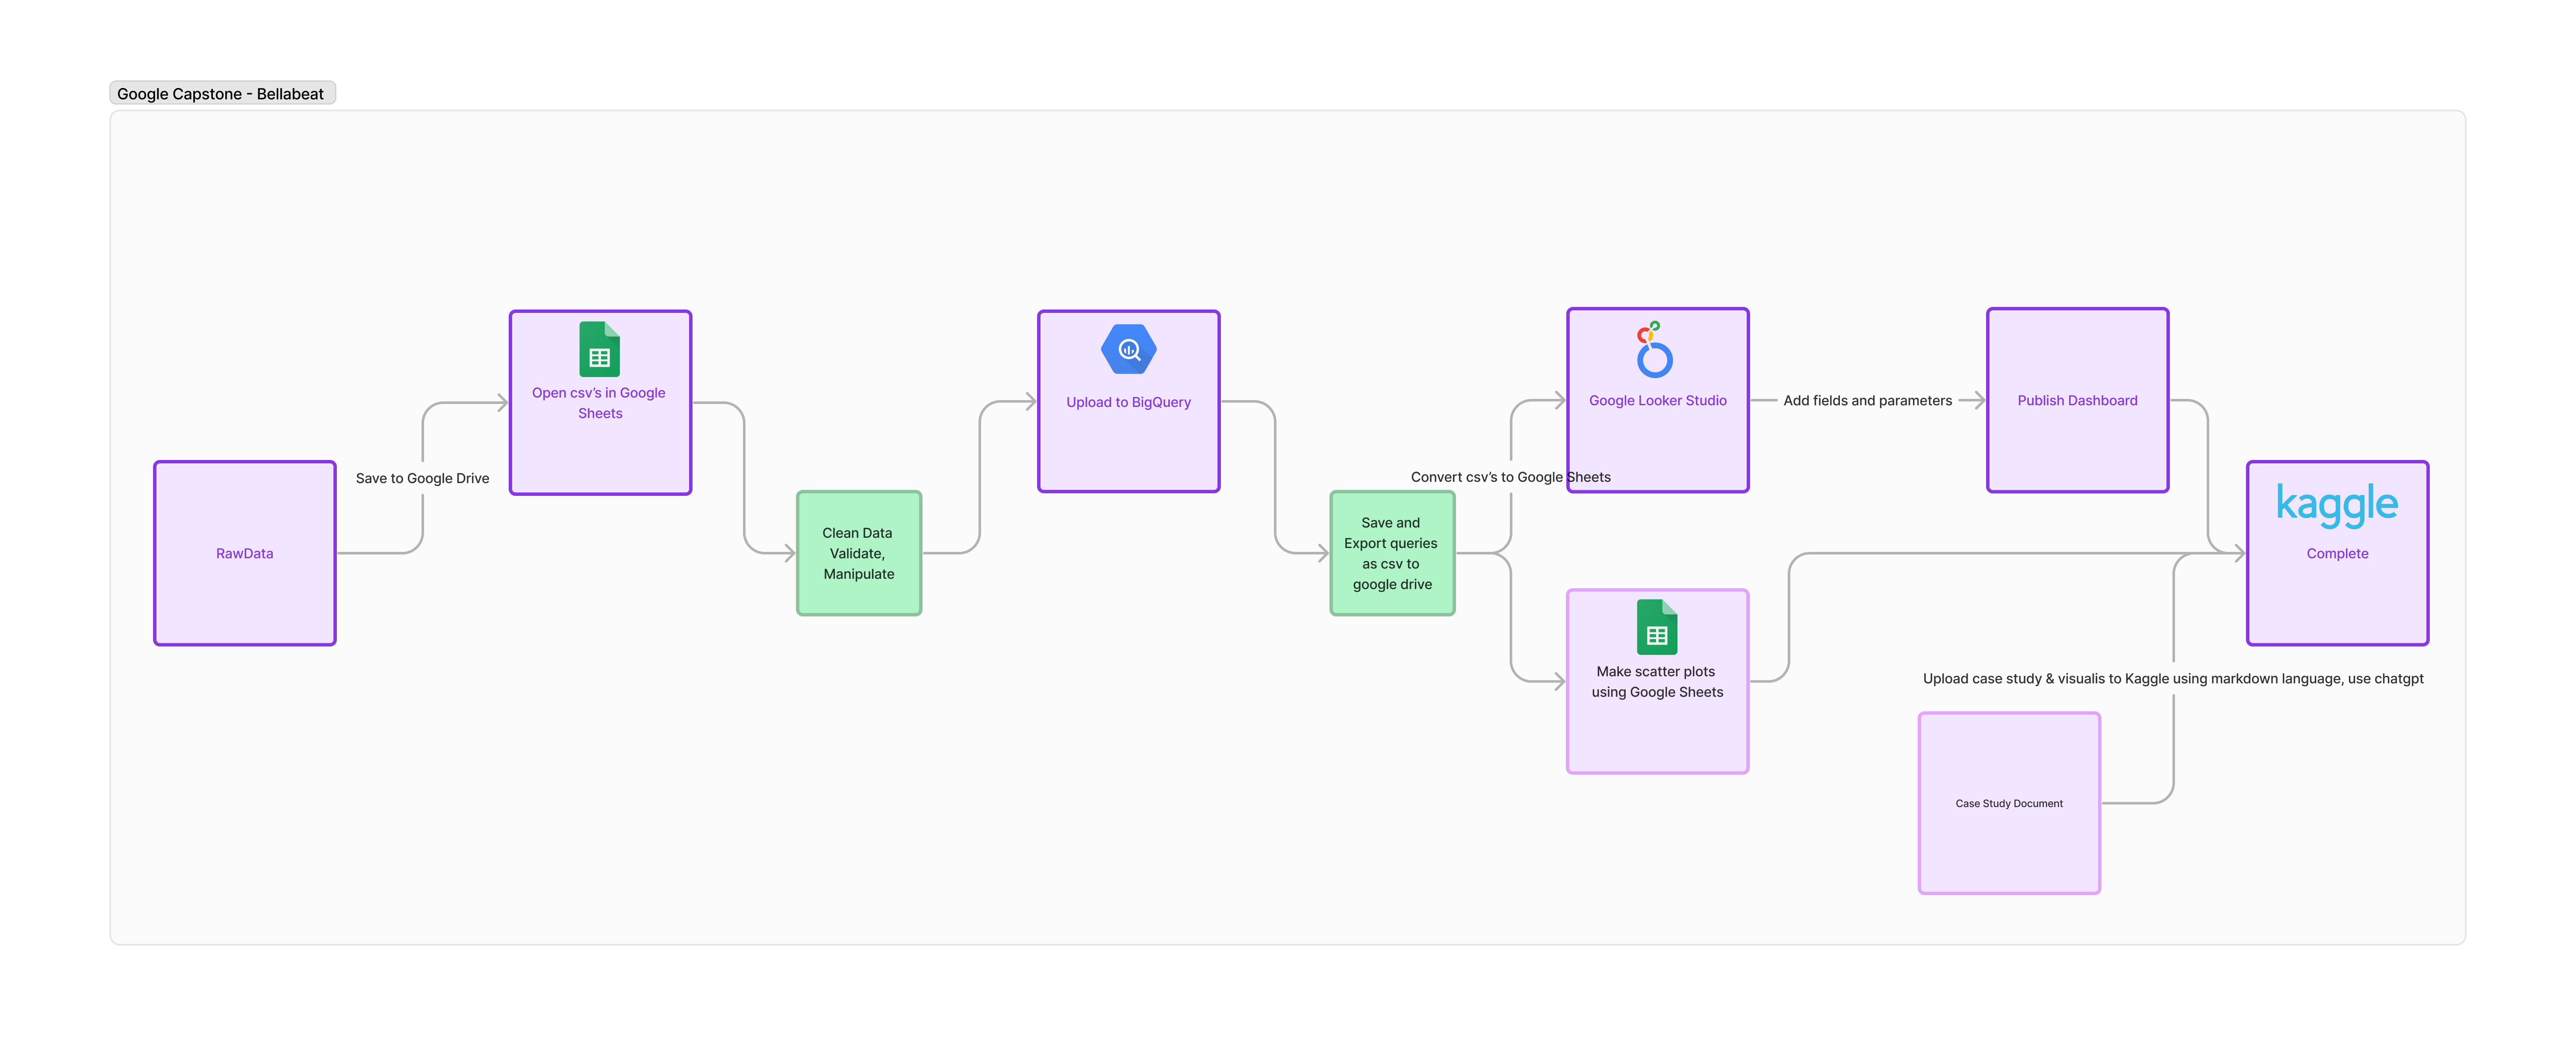